# Import Library For Read CSV File

In [137]:
import pandas as pd
data=pd.read_csv("insurance.csv")

# 1. Display Top 5 Rows of The Dataset

In [138]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Check Last 5 Rows of The Dataset

In [139]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns) 

In [140]:
data.shape

(1338, 7)

In [141]:
print("number of rows",data.shape[0])
print("number of columns",data.shape[1])

number of rows 1338
number of columns 7


# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 5. Get Overall Statistics About The Dataset

In [143]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# 6. Check Null Values In The Dataset

In [144]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 7. Covert Columns From String ['sex' ,'smoker','region' ] To Numerical Values

In [145]:
data['sex'].unique()
data['sex']=data['sex'].map({'female':0,'male':1})

In [146]:
data['smoker'].unique()
data['smoker']=data['smoker'].map({'yes':0,'no':1})

In [147]:
data['region'].unique()
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':2,'northeast':3})

In [148]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


# 8.  Store Feature Matrix In X and Response(Target) In Vector y

In [149]:
data.columns
X=data.drop(['charges'],axis=1)

In [150]:
y=data['charges']

# 9. Train/Test split


## 1. Split data into two part : a training set and a testing set


## 2. Train the model(s) on training set


## 3. Test the Model(s) on Testing set# 

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 10. Import the models

In [153]:
from sklearn.linear_model import LinearRegression

# 11. Model Training

In [154]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# 12. Prediction on Test Data

In [155]:
y_pred=lr.predict(X_test)

In [171]:
df=pd.DataFrame({'Actual':y_test,'Lr':y_pred})

In [172]:
df

,Actual,Lr
764,9095.06825,8939.241671
887,5272.17580,6975.708874
890,29330.98315,36775.493316
1293,9301.89355,9397.714554
259,33750.29180,26853.695957
...,...,...
109,47055.53210,39228.704998
575,12222.89830,11690.308190
535,6067.12675,7642.413502
543,63770.42801,41018.806500


# 13. Compare Performance

In [173]:
import matplotlib.pyplot as plt

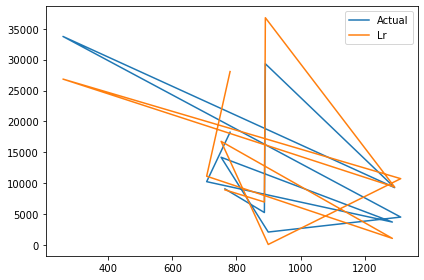

In [174]:
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['Lr'].iloc[0:11],label='Lr')

plt.tight_layout()
plt.legend()

In [175]:
from sklearn import metrics

In [176]:
score=metrics.r2_score(y_test,y_pred)
print(score)

0.782439611316498


# 14  Predict Charges For New Customer

In [178]:
data={'age':40,
     'sex':1,
     'bmi':40.30,
     'children':4,
     'smoker':1,
     'region':2}

In [179]:
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [181]:
new_pred=lr.predict(df)
print("Medical Insurance Cost For New Customer Is:",new_pred[0])

Medical Insurance Cost For New Customer Is: 13115.282127485478
